In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('uber.csv')

In [5]:
data.info

<bound method DataFrame.info of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC    

In [6]:
data.shape

(200000, 9)

In [7]:
data.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
data = data .drop(['Unnamed: 0','key'],axis=1)
data .dropna(axis=0,inplace=True)

In [11]:
data .isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [13]:
 data['Distance']= haversine(data['pickup_longitude'],data['dropoff_longitude'],
                             data['pickup_latitude'],data['dropoff_latitude'])
    

In [14]:
data['Distance'] = data['Distance'].astype(float).round(2)    

In [15]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Text(0, 0.5, 'fare_amount')

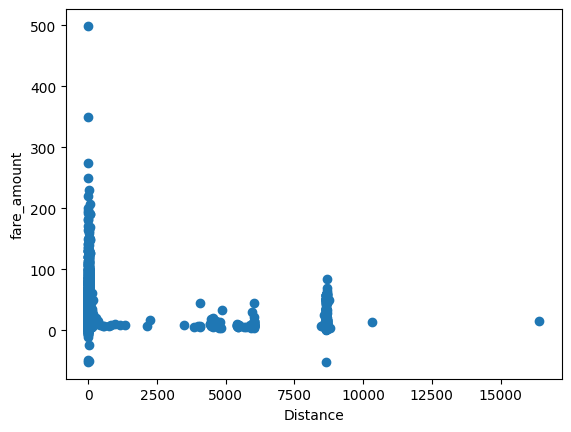

In [16]:
plt.scatter(data['Distance'],data['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [17]:
data.drop(data[data['Distance'] > 60].index, inplace = True)
data.drop(data[data['Distance'] == 0].index, inplace = True)
data.drop(data[data['fare_amount'] == 0].index, inplace = True)
data.drop(data[data['fare_amount'] < 0].index, inplace = True)


In [18]:
data.drop(data[(data['fare_amount']>100) & (data['Distance']<1)].index, inplace = True )
data.drop(data[(data['fare_amount']<100) & (data['Distance']>100)].index, inplace = True )


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193481 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193481 non-null  float64
 1   pickup_datetime    193481 non-null  object 
 2   pickup_longitude   193481 non-null  float64
 3   pickup_latitude    193481 non-null  float64
 4   dropoff_longitude  193481 non-null  float64
 5   dropoff_latitude   193481 non-null  float64
 6   passenger_count    193481 non-null  int64  
 7   Distance           193481 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.3+ MB


In [20]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [21]:
data['Year'] =data['pickup_datetime'].apply(lambda time: time.year)
data['Month'] = data['pickup_datetime'].apply(lambda time: time.month)
data['Day'] = data['pickup_datetime'].apply(lambda time: time.day)
data['Day of Week'] = data['pickup_datetime'].apply(lambda time: time.dayofweek)
data['Day of Week_num'] = data['pickup_datetime'].apply(lambda time: time.dayofweek)
data['Hour'] = data['pickup_datetime'].apply(lambda time: time.hour)


In [22]:
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(day_map)


In [23]:
data['counter'] = 1

In [24]:
data['pickup'] = data['pickup_latitude'].astype(str) + "," + data['pickup_longitude'].astype(str)   
data['drop off'] = data['dropoff_latitude'].astype(str) + "," + data['dropoff_longitude'].astype(str)

In [25]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,Day of Week_num,Hour,counter,pickup,drop off
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015,5,7,Thu,3,19,1,"40.73835372924805,-73.99981689453125","40.72321701049805,-73.99951171875"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009,7,17,Fri,4,20,1,"40.728225,-73.994355","40.750325,-73.99471"
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04,2009,8,24,Mon,0,21,1,"40.74077,-74.005043","40.772647,-73.962565"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009,6,26,Fri,4,8,1,"40.790844,-73.976124","40.803349,-73.965316"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014,8,28,Thu,3,17,1,"40.744085,-73.925023","40.761247,-73.97308199999999"


In [26]:

import statistics as st

In [27]:
print("Mean of fare prices is % s "
         % (st.mean(data['fare_amount'])))


Mean of fare prices is 11.311137476031238 


In [28]:
print("Median of fare prices is % s "
         % (st.median(data['fare_amount'])))

Median of fare prices is 8.5 


In [29]:
print("Standard Deviation of Fare Prices is % s "
                % (st.stdev(data['fare_amount'])))


Standard Deviation of Fare Prices is 9.501354886915946 


In [30]:
print("Mean of Distance is % s "
         % (st.mean(data['Distance'])))

Mean of Distance is 3.3573488352861522 


In [31]:
print("Median of Distance is % s "
         % (st.median(data['Distance'])))

Median of Distance is 2.18 


In [32]:
print("Standard Deviation of Distance is % s "
                % (st.stdev(data['Distance'])))

Standard Deviation of Distance is 3.5995030824386185 


In [33]:
X = data['Distance'].values.reshape(-1, 1)        
y = data['fare_amount'].values.reshape(-1, 1)

In [34]:
pip install sklearn


  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2979 sha256=2a2cdb9d257c8336e6a63adca4740bd858c5f874b06b6f3787ffdcf6249f521f
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\5b\f6\92\0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn


In [37]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)


[[-0.4011162 ]
 [-0.38006651]
 [ 0.16722527]
 ...
 [ 2.06169682]
 [ 0.33562274]
 [ 0.29352337]]


In [38]:
x_std = std.fit_transform(X)
print(x_std)


[[-0.46599576]
 [-0.24929862]
 [ 0.46746884]
 ...
 [ 2.63721838]
 [ 0.05074357]
 [ 0.57303924]]


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)


In [40]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

In [41]:
print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.8006071


In [42]:
y_pred = l_reg.predict(X_test)
df = {'Actual': y_test, 'Predicted': y_pred}

In [44]:
from tabulate import tabulate
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+-------------+--------------+
|      Actual |    Predicted |
|-------------+--------------|
| -0.548464   | -0.663476    |
| -0.769486   | -0.611449    |
|  0.651368   |  0.290356    |
|  6.86102    |  3.52595     |
| -0.611613   | -0.544557    |
| -0.16957    | -0.333971    |
| -0.295868   | -0.0490599   |
| -0.0853709  | -0.224961    |
| -0.506365   | -0.517305    |
| -0.558989   | -0.628792    |
|  0.914489   |  1.69261     |
|  2.94894    |  1.3854      |
|  0.0409272  | -0.202664    |
|  1.23023    |  0.282923    |
| -0.506365   | -0.584197    |
| -0.590563   | -0.599062    |
| -0.401116   | -0.378566    |
|  4.84341    |  4.53429     |
| -0.674762   | -0.524737    |
|  0.0198775  | -0.106042    |
| -0.337967   | -0.0986096   |
| -0.348492   | -0.54208     |
| -0.243244   | -0.158069    |
| -0.243244   | -0.272034    |
| -0.337967   | -0.566854    |
| -0.548464   | -0.537125    |
| -0.137995   | -0.309196    |
| -0.243244   | -0.42316     |
| -0.422166   | -0.279466    |
| -0.664

In [45]:

from sklearn import metrics

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred),"%")
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23979020298617207
Mean Absolute % Error: 2.712440862806946 %
Mean Squared Error: 0.19845894128014663
Root Mean Squared Error: 0.44548730765325584


In [47]:
print(l_reg.intercept_)
print(l_reg.coef_)


[-0.00016705]
[[0.89176936]]
